In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt 
import random as rd
import numpy as np

In [40]:
from sklearn.datasets import fetch_california_housing
housingdata = fetch_california_housing()

sser = StandardScaler()
X = sser.fit_transform(housingdata.data,housingdata.target)
X_train_full,X_test,y_train_full,y_test = train_test_split(X,housingdata.target,test_size=0.25)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.25)

In [41]:

nnmr = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1,activation="relu"),
])
# nnm.summary()
#from keras.optimizers import SGD
#optimizer=SGD(learning_rate=0.01)
nnmr.compile(loss="mean_squared_error",optimizer="sgd")
# weights,biases = nnm.layers[1].get_weights()
history = nnmr.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 1ms/step - loss: 0.8512 - val_loss: 0.5708
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4797 - val_loss: 0.5087
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4440 - val_loss: 0.4902
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 0.4777
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4152 - val_loss: 0.4711
Epoch 6/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4066 - val_loss: 0.4568
Epoch 7/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3974 - val_loss: 0.4510
Epoch 8/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3905 - val_loss: 0.4480
Epoch 9/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3849 - val_loss: 0.4422
Epoch 10/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3825 - val_loss: 0.4426

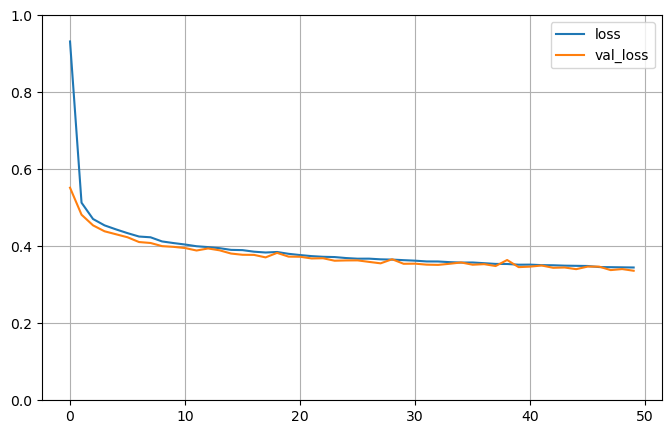

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



In [31]:
nnmr.evaluate(X_test,y_test)
y_pred = nnmr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

162/162 [==============================] - 0s 685us/step


0.30955962359714784